对任意两条路径计算相似度，具体来说，当计算
   $$ Similarity_{r_{1}->r_{2}} = \frac{N(p)}{N(r_{1})} $$
   $N(p)$为r1中靠近r2的点的个数,$N(r1)$为r1的路径点的总个数，$ Similarity_{r_{1}->r_{2}}$就是$ r_{1}$对$r_{2} $的相似度，或者说两者之间的距离
   
而检查$r1$中某个p点是否靠近一条路径$r_2$，若这条路径$r_2$中
    $$\exists x \in r_2, distance(x, p) <= \varepsilon_1$$
$ \varepsilon_1 $为一个阈值,表示两个点是否邻近,$distance(x, p)$为两点之间的欧氏距离

若对$r_1$和$r_2$来说，满足
$$ Similarity_{r_{1}->r_{2}} >= \varepsilon_2 \ and \  Similarity_{r_{2}->r_{1}} >= \varepsilon_2$$
则可以判定两条路径属于同一个簇
      

In [36]:
'''
预定义两个阈值：探测半径和相似度阈值
'''
detect_radius = 40
similarity_threashold = 0.5

# 数据读取和转换成标准numpy数组
file = open("TrackData-3.txt")
import re

P = []
for path in file.readlines():
    path = re.sub('Track-\d+:\d+:','',path)
    path=path.strip('\n')
    path = path.split('#')
    nPath = []
#     print path
    for point in path:
        point = [x,y] = point.split(',')
        nPath.append(point)
#     print(nPath)
    X = []
    Y = []
    for point in nPath:
        X.append(float(point[0]))
        Y.append(float(point[1]))
#     print X,Y
    P.append([X,Y])


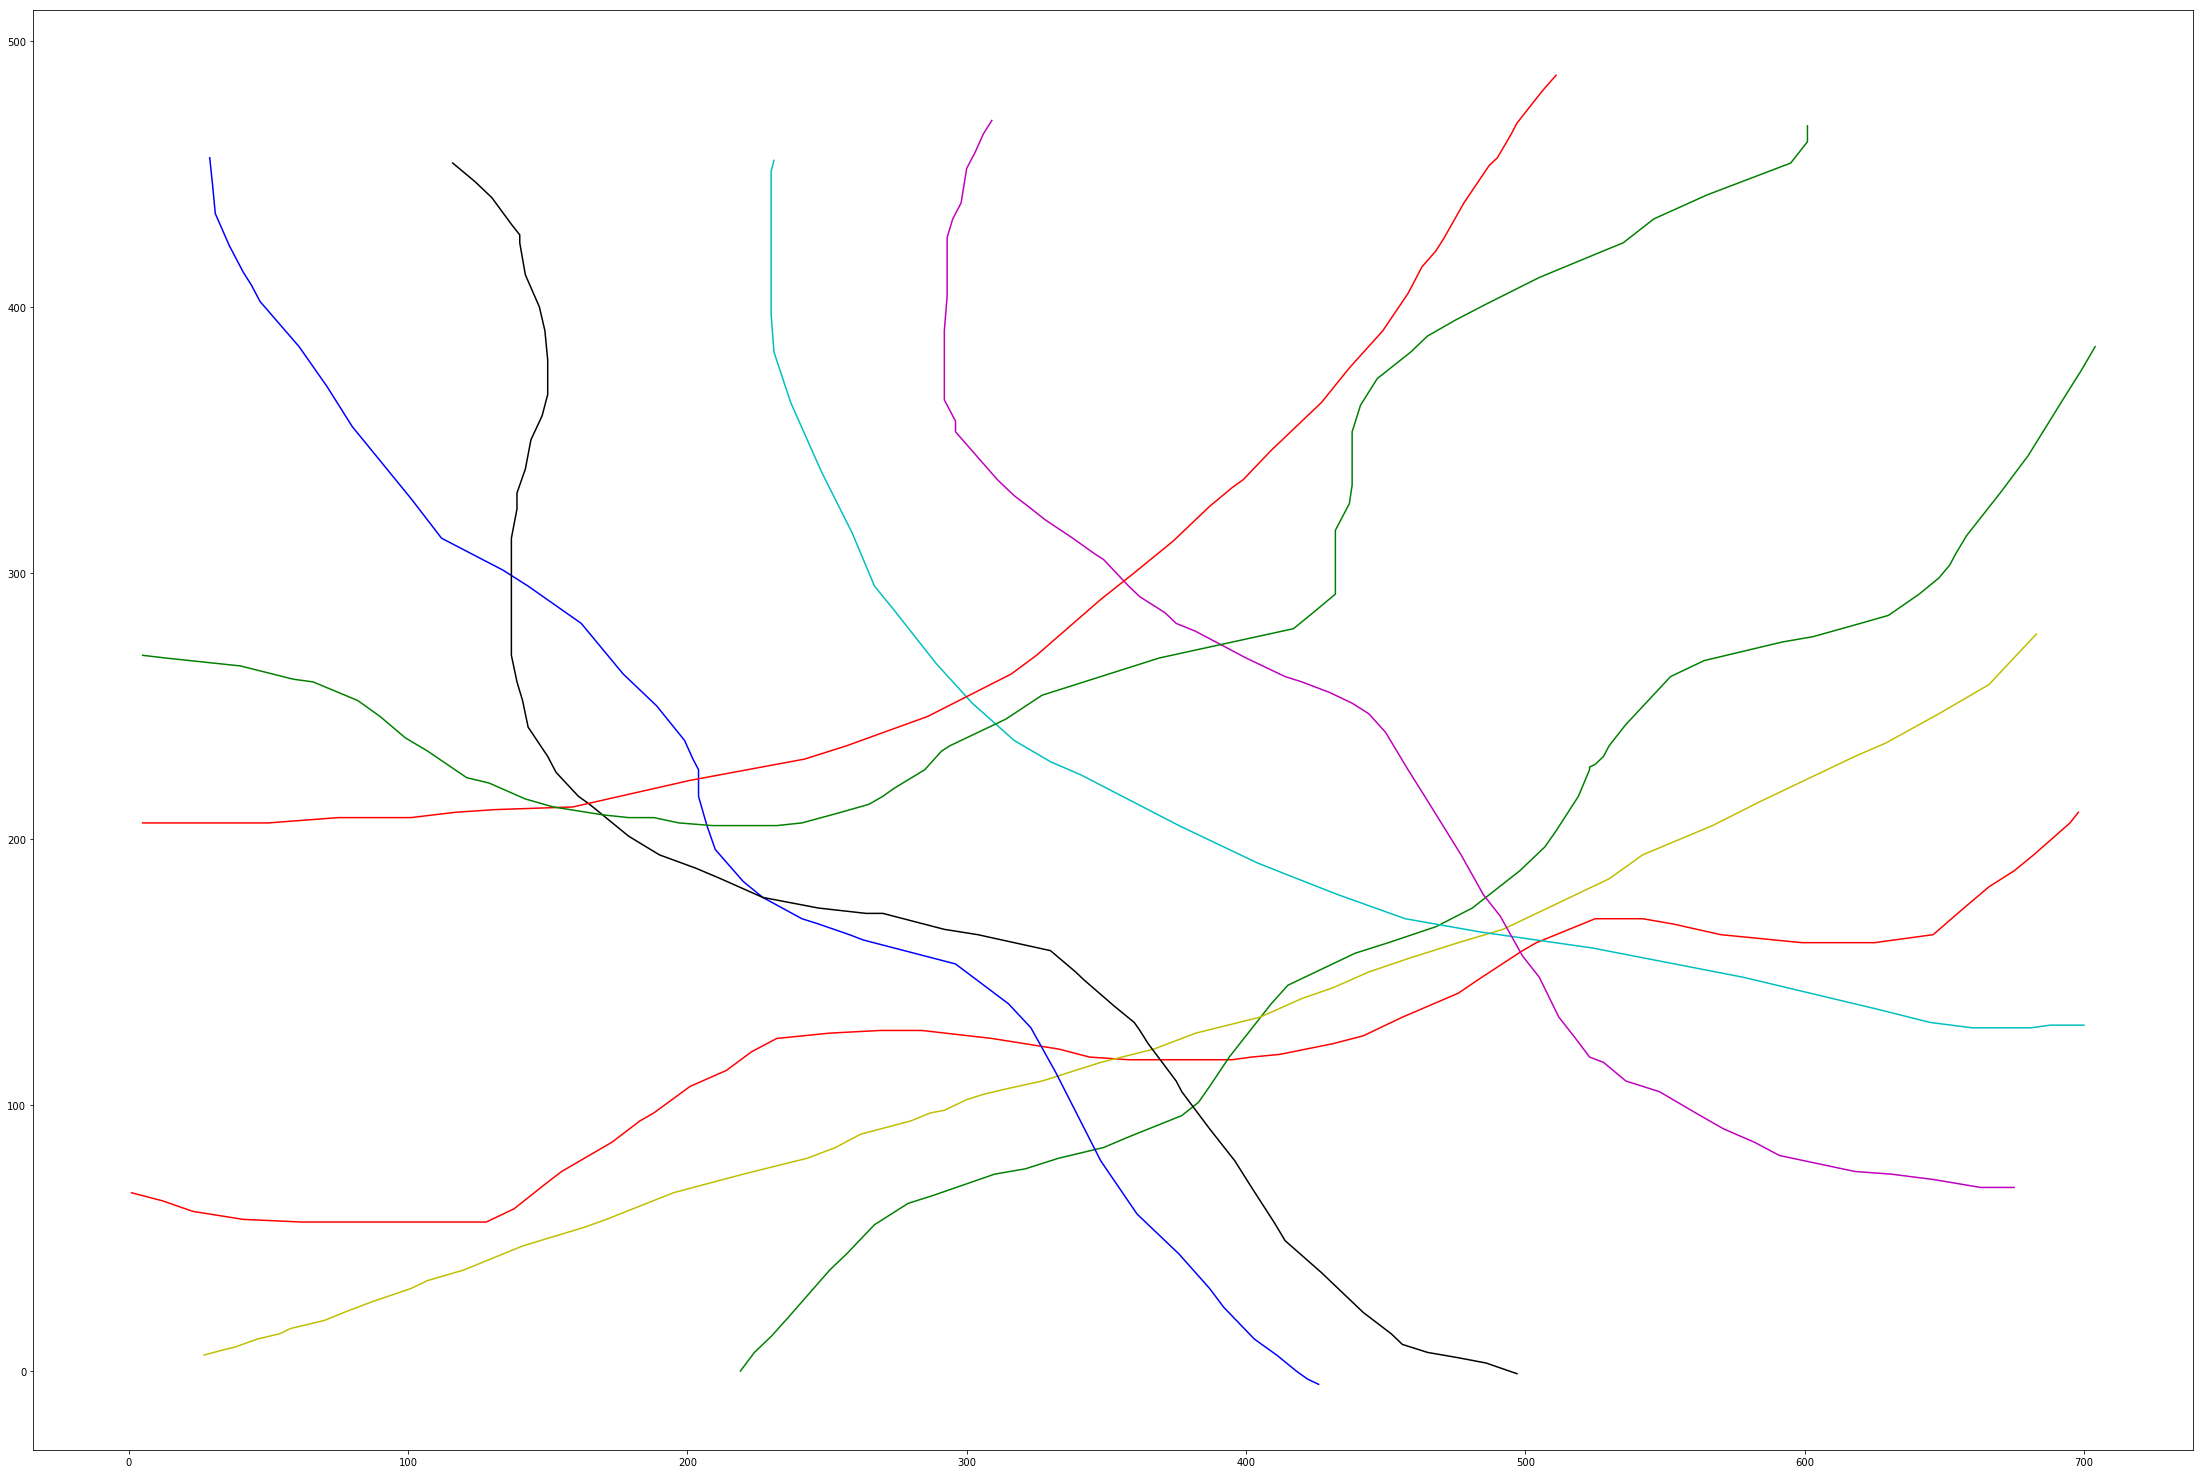

In [37]:
from matplotlib import pyplot as plt
colors = ['r','g','y','b','k','c','m']

rect = [0, 0, 5, 5]
ax = plt.axes(rect)
for index,path in enumerate(P):
    ax.plot(path[0],path[1],colors[index%7])
plt.show()

In [38]:
import math
# 判断两个点是否是邻近点
def is_closed(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2) < detect_radius

In [39]:
# 计算r1对r2的相似度，注意这个地方的r1->r2的相似度和r2->r1的相似度不相同
def similarity(r1, r2):
    t = [0 for x in r1[0]]
    j = 0
    for idx1,x1 in enumerate(r1[0]):
        for idx2,x2 in enumerate(r2[0]): 
            if(idx1 < len(r1[0]) and idx2 < len(r2[0])):
                if is_closed([x1,r1[1][idx1]],[x2,r2[1][idx2]]):
                    t[idx1] = 1
                    break
                else:
                    j = j + 1
    s = [x for x in t if x ==1] 
    return float(len(s))/float(len(t))

In [40]:
# 计算相似度矩阵
import numpy as np
simi = np.zeros((len(P),len(P)))
for i1, r1 in enumerate(P):
    for i2, r2 in enumerate(P):
            simi[i1][i2] = similarity(r1, r2)

print(simi)

[[ 1.          0.30769231  0.69230769  0.17307692  0.21153846  0.25
   0.11538462  0.          0.        ]
 [ 0.35185185  1.          0.55555556  0.11111111  0.14814815  0.14814815
   0.11111111  0.          0.        ]
 [ 0.67924528  0.47169811  1.          0.11320755  0.11320755  0.16981132
   0.09433962  0.          0.        ]
 [ 0.15909091  0.06818182  0.09090909  1.          0.70454545  0.          0.
   0.18181818  0.25      ]
 [ 0.20967742  0.12903226  0.14516129  0.61290323  1.          0.          0.
   0.16129032  0.24193548]
 [ 0.21875     0.15625     0.125       0.          0.          1.          0.09375
   0.125       0.15625   ]
 [ 0.11864407  0.08474576  0.10169492  0.          0.          0.13559322
   1.          0.15254237  0.16949153]
 [ 0.          0.          0.          0.05405405  0.10810811  0.08108108
   0.08108108  1.          0.64864865]
 [ 0.          0.          0.          0.16393443  0.26229508  0.09836066
   0.06557377  0.68852459  1.        ]]


In [41]:
# 对轨迹进行聚类
clusters = [0] * len(simi)
i = 1
for x, row in enumerate(simi):
    for y, item in enumerate(row):
        if(item >= similarity_threashold and simi[y][x] >= similarity_threashold):
            if(clusters[x] != 0):
                clusters[y] = clusters[x]
            else:
                clusters[y] = clusters[x] = i
                i = i + 1 
i = i - 1
print(clusters)
print 'Total cluster is:', i 

[1, 2, 1, 3, 3, 4, 5, 6, 6]
Total cluster is: 6


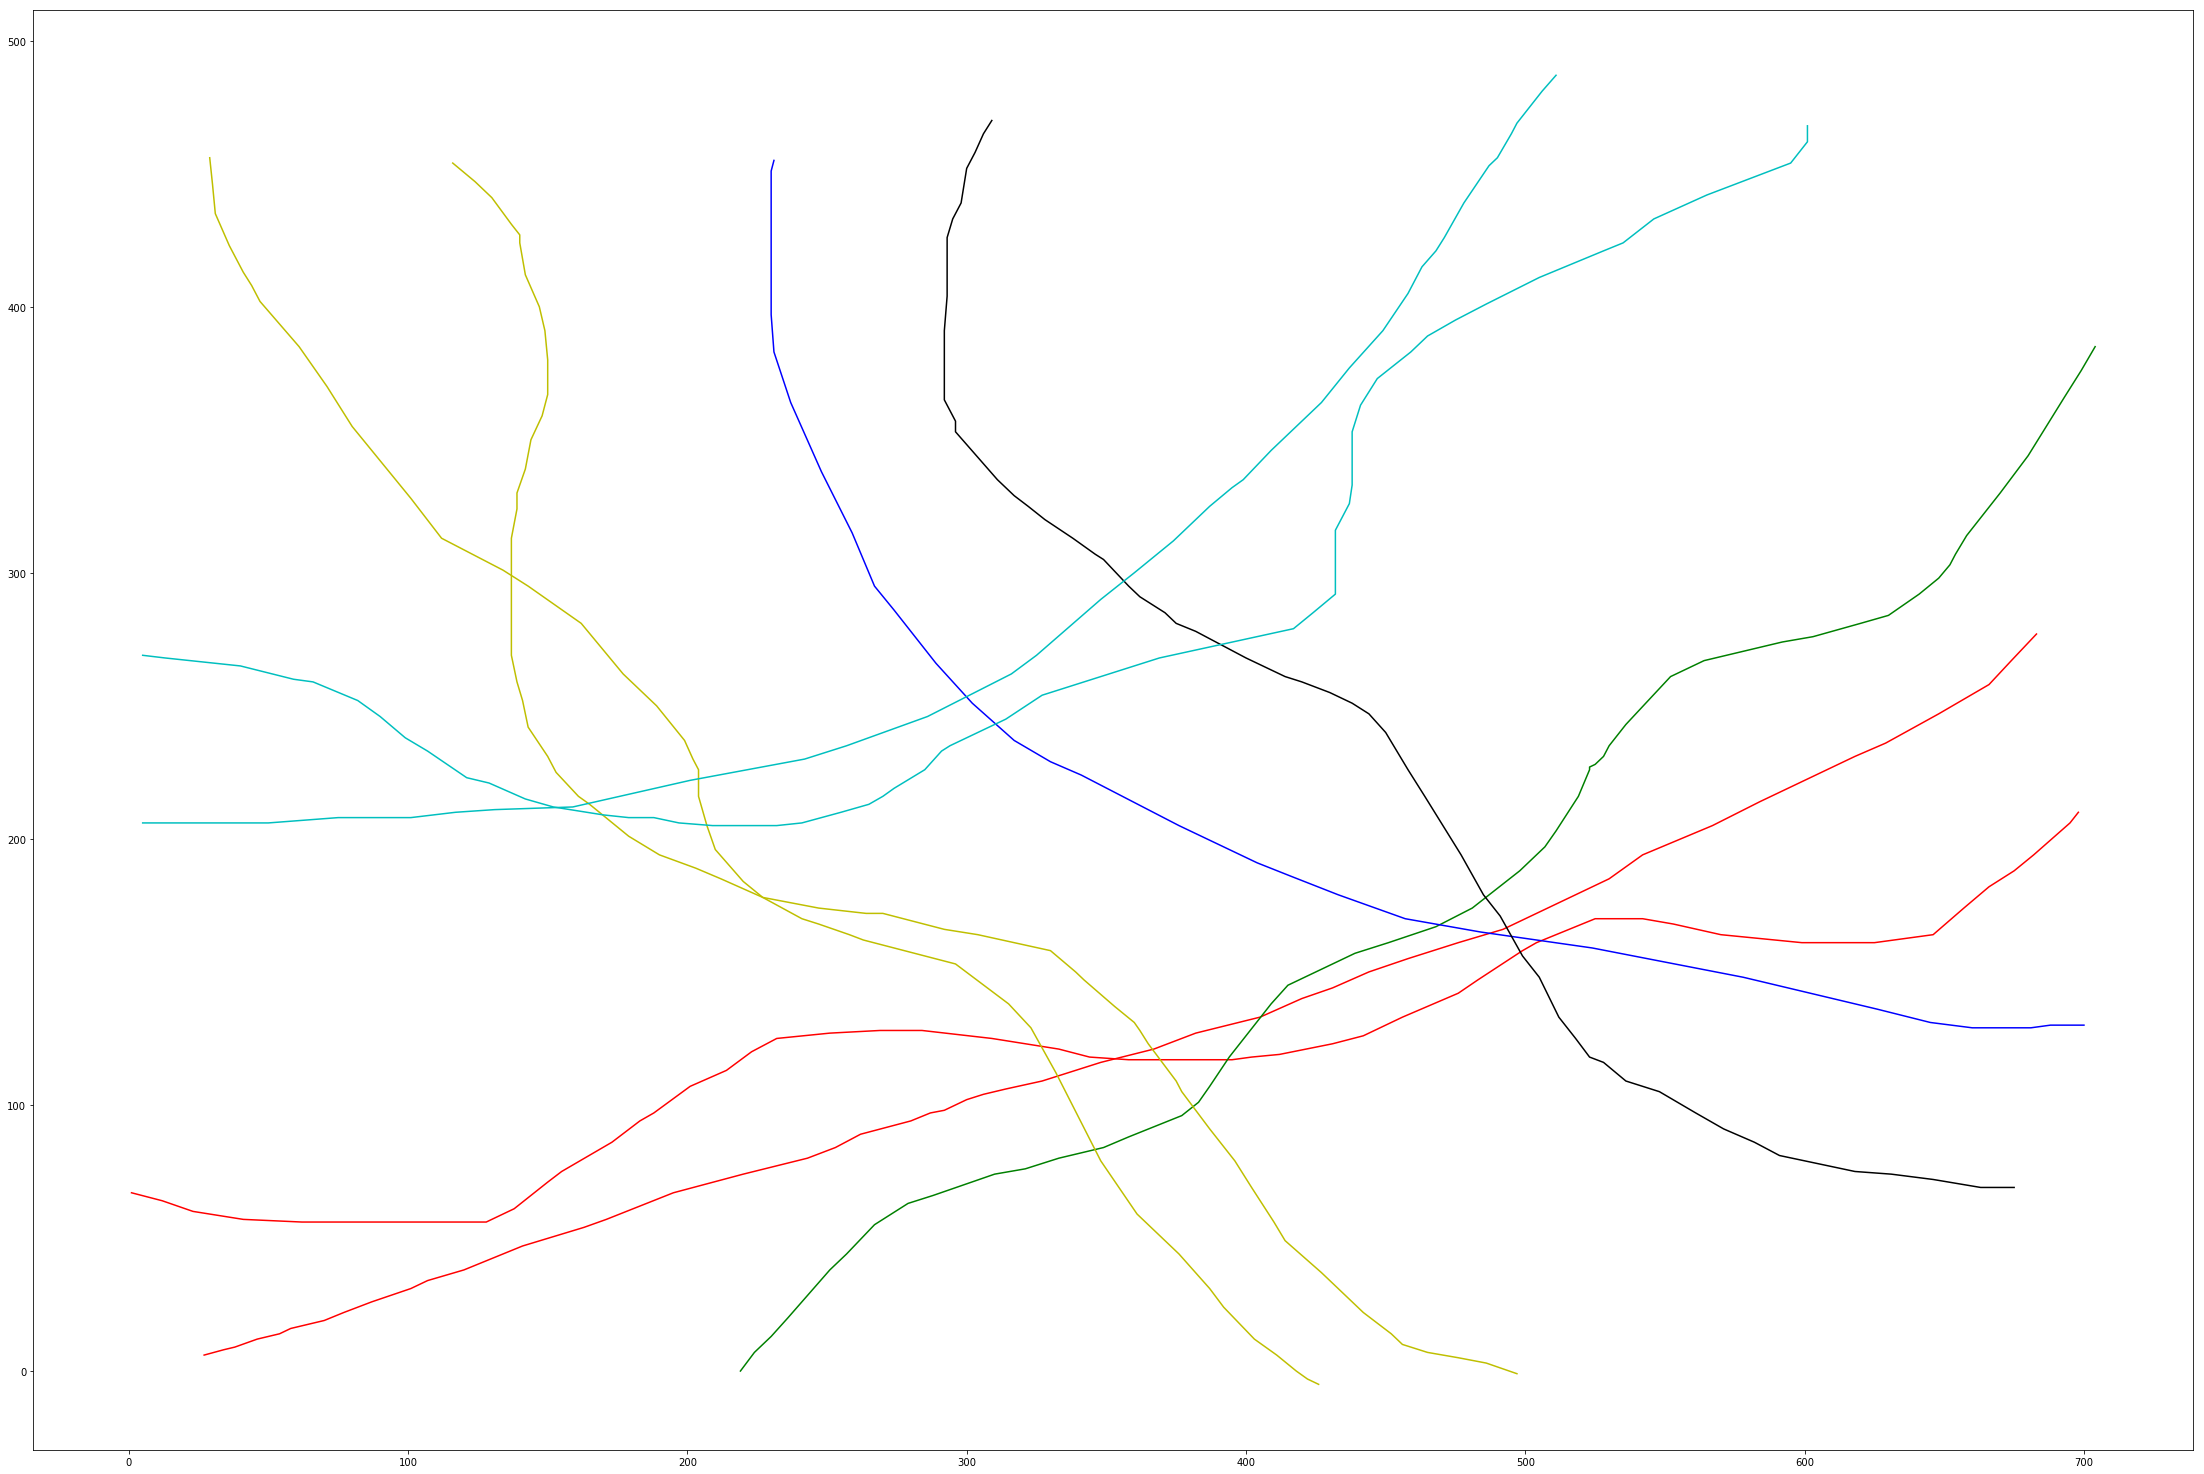

In [42]:
ax = plt.axes(rect)
j = 1
while j <= i:
    k = 0
    while(k < len(clusters)):
        if clusters[k] == j:
            ax.plot(P[k][0],P[k][1],colors[j-1])
        k = k + 1
    j = j + 1

# ax.plot(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5)
plt.show()